# Session 15 : Sequential Model_Multiple class

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

<p style="font-family: Arial; font-size:1.2em;color:black;">
By Pramod Sharma : pramod.sharma@prasami.com
<p>

In [2]:
# Lets import some libraries
import os

import numpy as np

import pandas as pd

import pickle

import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

%matplotlib inline

In [25]:
# Some basic parameters

inpDir = '../input' # location where input data is stored
outDir = '../output' # location to store outputs
modelfile = 'model.pkl'
RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
EPOCHS = 10000 # number of cycles to run

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (9,6),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

plt.rcParams.update(params) # update rcParams

## Load Data Set
<p style="font-family: Arial; font-size:1.2em;color:black;">
Use Fashion MNIST dataset.
</p>

In [4]:
train_filename = os.path.join(inpDir, 'fashion_mnist', 'fashion-mnist_train.csv')
test_filename = os.path.join(inpDir, 'fashion_mnist', 'fashion-mnist_test.csv')

train_df = pd.read_csv(train_filename, header = 0)
test_df = pd.read_csv(test_filename, header = 0)

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


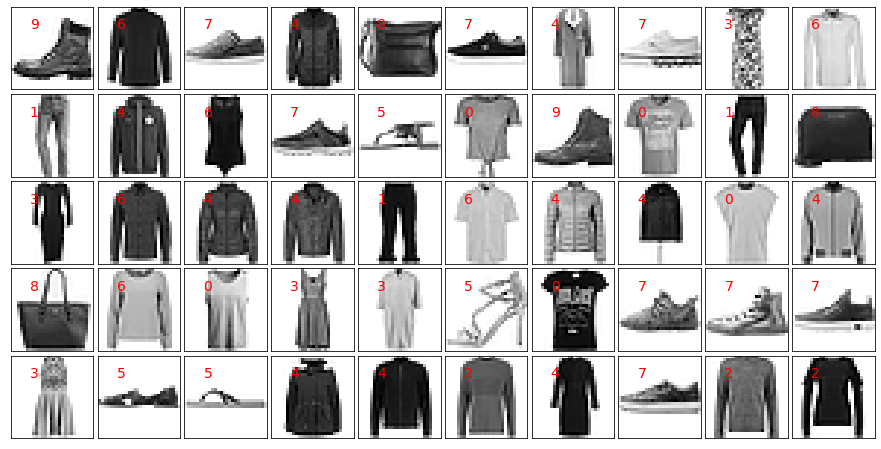

In [7]:
plot_df = train_df.sample(n = 50) 

fig = plt.figure(figsize=(12, 6))  # figure size in inches

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

i = 0
for count, row in plot_df.iterrows():
    i = i + 1
    image = row.values[1:].reshape(28,28)
    ax = fig.add_subplot(5, 10, (i), xticks=[], yticks=[])
    ax.imshow(image, cmap=plt.cm.binary, interpolation='nearest')
    ax.text(6, 7, str(row[0]), color='red', fontsize=14)   
plt.show()

In [8]:
test_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [10]:
one_hot = OneHotEncoder(sparse=False)
y_train = train_df[["label"]]
X_train = train_df.drop('label', axis = 1).values
y_train = one_hot.fit_transform(y_train)

y_test = test_df[["label"]]
X_test = test_df.drop('label', axis = 1).values
y_test = one_hot.transform(y_test)

In [11]:
X_train.shape, y_train.shape

((60000, 784), (60000, 10))

# Neural Network
<p style="font-family: Arial; font-size:1.2em;color:black;"> 
    Moving over to multilayer network. Our data has <strong>two</strong> features. Hence size of input layer will also be two. The output is binary, we can code it as single column as well as double column output. The hidden layers will be as follows:</p>
<table style="font-family: Arial; font-size:1.2em;color:black;">
    <tr>
        <th>#</th>
        <th>Layer Number</th>
        <th>Nodes </th>
        <th>Activation </th>
    </tr>
    <tr>
        <td>1</td>
        <td>Input Layer</td>
        <td>784</td>
        <td>tanh</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Hidden Layer 1</td>
        <td>20</td>
        <td>tanh</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Hidden Layer 2</td>
        <td>20</td>
        <td>tanh</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Hidden Layer 3</td>
        <td>10</td>
        <td>tanh</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Hidden Layer 4</td>
        <td>10</td>
        <td>tanh</td>
    </tr>
    <tr>
        <td>6</td>
        <td>Output Layer 4</td>
        <td>10</td>
        <td>logits</td>
    </tr>
</table>


In [13]:
# Helper function to evaluate the total loss on the dataset

def calculate_loss(model, X, y):
    
    # Extract weights and losses from the model
    W1, W2, W3, W4, W5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5']
    b1, b2, b3, b4, b5 = model['b1'], model['b2'], model['b3'], model['b4'], model['b5']
    
    #***********************************
    # Layer 1
    Z1 = X.dot(W1) + b1 
    A1 = np.tanh(Z1)    # tanh activation
    assert (Z1.shape == A1.shape),"Shape of Z1 and A1 do not match"

    # Layer 2
    Z2 = A1.dot(W2) + b2 
    A2 = np.tanh(Z2)    # tanh activation
    assert (Z2.shape == A2.shape),"Shape of Z2 and A2 do not match"

    # Layer 3
    Z3 = A2.dot(W3) + b3 
    A3 = np.tanh(Z3)    # tanh activation
    assert (Z3.shape == A3.shape),"Shape of Z3 and A3 do not match"

    # Layer 4
    Z4 = A3.dot(W4) + b4 
    A4 = np.tanh(Z4)    # tanh activation
    assert (Z4.shape == A4.shape),"Shape of Z4 and A4 do not match"


    Z5 = A4.dot(W5) + b5
    exp_scores = np.exp(Z5) # softmax for final layer as it is binary classification
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    #*************************************
        
    # Calculating the loss
    # Cross entropy = ground truth x log (predicted)
    # probability of y being correct is 1. hence it will be a vector of [1,1,...,1,1]
    #correct_logprobs = - (y.dot(np.log(probs.T)) + (1 - y).dot(np.log(1 - probs).T))
    correct_logprobs = - (y* np.log(probs) + (1 - y) *np.log(1 - probs))
    #print (correct_logprobs)
    #correct_logprobs = -np.log(probs[range(num_examples), y]) 
    data_loss = np.sum(correct_logprobs)
    print (data_loss)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    
    return 1./num_examples * data_loss

## Predict Function
<p style="font-family: Arial; font-size:1.2em;color:black;">
For predictions, we will simply be using the forward propagation. No need to iterate or calculate the back propogation for supervised learning.
</p>

In [14]:
# Helper function to predict an output (0 or 1)

def predict(model, x):
    '''
     Args:
         model
         x: input features
    '''
    # Extract weights and losses from the model
    W1, W2, W3, W4, W5 = model['W1'], model['W2'], model['W3'], model['W4'], model['W5']
    b1, b2, b3, b4, b5 = model['b1'], model['b2'], model['b3'], model['b4'], model['b5']
    
    #***********************************
    # Layer 1
    Z1 = x.dot(W1) + b1 
    A1 = np.tanh(Z1)    # tanh activation
    assert (Z1.shape == A1.shape),"Shape of Z1 and A1 do not match"

    # Layer 2
    Z2 = A1.dot(W2) + b2 
    A2 = np.tanh(Z2)    # tanh activation
    assert (Z2.shape == A2.shape),"Shape of Z2 and A2 do not match"

    # Layer 3
    Z3 = A2.dot(W3) + b3 
    A3 = np.tanh(Z3)    # tanh activation
    assert (Z3.shape == A3.shape),"Shape of Z3 and A3 do not match"

    # Layer 4
    Z4 = A3.dot(W4) + b4 
    A4 = np.tanh(Z4)    # tanh activation
    assert (Z4.shape == A4.shape),"Shape of Z4 and A4 do not match"


    Z5 = A4.dot(W5) + b5
    
    # use softmax
    exp_scores = np.exp(Z5) # softmax for final layer as it is binary classification
    
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    #*************************************    
    return np.argmax(probs, axis=1) # pick with one with highest probabilities

In [15]:
# prepare the Model

def build_model(param, X, y, num_epochs=20000,  print_loss=False):
    
    '''
        nn_hdim : Number of nodes in the hidden layer
        X : Features to train on
        y : Targets to train on
        num_passes : Number of passes through the training data for gradient descent
        print_loss : If True, print the loss every 1000 iterations
    '''
    # set Random Seed
    np.random.seed(RANDOM_STATE)
    model_filename = os.path.join(outDir, modelfile)
    exists = os.path.isfile(model_filename)
    if exists:
        print ('Model exists at : ', model_filename)
        # Load configuration file values
        infile = open(model_filename,'rb')
        model = pickle.load(infile)
        infile.close()
        
        # Initialise wwith loaded model
        W1 = model['W1']
        b1 = model['b1']
        
        W2 = model['W2']
        b2 = model['b2']
        
        W3 = model['W3']
        b3 = model['b3']
        
        W4 = model['W4']
        b4 = model['b4']
        
        W5 = model['W5']
        b5 = model['b5']
        
    else:
        # Keep presets
    
        # Initialize the parameters to random model[values. We need to learn these.
        W1 = np.random.randn(param['nn_hdim'][0], param['nn_hdim'][1]) / np.sqrt(param['nn_hdim'][0])
        b1 = np.zeros((1, param['nn_hdim'][1]))

        W2 = np.random.randn(param['nn_hdim'][1], param['nn_hdim'][2]) / np.sqrt(param['nn_hdim'][1])
        b2 = np.zeros((1, param['nn_hdim'][2]))

        W3 = np.random.randn(param['nn_hdim'][2], param['nn_hdim'][3]) / np.sqrt(param['nn_hdim'][2])
        b3 = np.zeros((1, param['nn_hdim'][3]))

        W4 = np.random.randn(param['nn_hdim'][3], param['nn_hdim'][4]) / np.sqrt(param['nn_hdim'][3])
        b4 = np.zeros((1, param['nn_hdim'][4]))

        W5 = np.random.randn(param['nn_hdim'][4], nn_output_dim) / np.sqrt(param['nn_hdim'][4])
        b5 = np.zeros((1, nn_output_dim))

        # This is what we return at the end
        model = {}
    
    assert (W1.shape == tuple(param['nn_hdim'][0:2])), 'Incorrect shape of W1 :{}'.format(W1.shape)
    
    
    epoch = []
    loss = []        
    
    # Gradient descent. For each batch...
    for i in range(0, num_epochs):

        # Forward propagation
        # Layer 1
        Z1 = X.dot(W1) + b1 
        A1 = np.tanh(Z1)    # tanh activation
        assert (Z1.shape == A1.shape),"Shape of Z1 and A1 do not match"
        
        # Layer 2
        Z2 = A1.dot(W2) + b2 
        A2 = np.tanh(Z2)    # tanh activation
        assert (Z2.shape == A2.shape),"Shape of Z2 and A2 do not match"
        
        # Layer 3
        Z3 = A2.dot(W3) + b3 
        A3 = np.tanh(Z3)    # tanh activation
        assert (Z3.shape == A3.shape),"Shape of Z3 and A3 do not match"

        # Layer 4
        Z4 = A3.dot(W4) + b4 
        A4 = np.tanh(Z4)    # tanh activation
        assert (Z4.shape == A4.shape),"Shape of Z4 and A4 do not match"


        Z5 = A4.dot(W5) + b5
        exp_scores = np.exp(Z5) # softmax for final layer as it is binary classification
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        #print ('probs.shape', probs.shape)

        
        # Backpropagation
        assert (probs.shape == y.shape),"Shape of probs {} and y {} do not match".format(probs.shape, y.shape)
        dZ5 = probs -y # shape = 1024, 2
        # layer 5 # dZ = (a-y)
        
        dW5 = (A4.T).dot(dZ5)/num_examples 
        db5 = np.sum(dZ5, axis=0, keepdims=True) / num_examples # db5 is vertical sum of dZ5
        dA4 = dZ5.dot(W5.T)
        assert (dW5.shape == W5.shape),"Shape of dW5 {} and W5 {} do not match".format(dW5.shape, W5.shape)
        assert (dA4.shape == A4.shape),"Shape of dA4 {} and A4 {} do not match".format(dA4.shape, A4.shape)
        
        # Layer 4 **********************************
        dZ4 = dA4 * (1 - np.power(A4, 2))
        assert (dZ4.shape == Z4.shape),"Shape of dZ4 {} and Z4{} do not match".format(dZ4.shape, Z4.shape)
        
        dW4 = (A3.T).dot(dZ4)/num_examples
        assert (dW4.shape == W4.shape),"Shape of dW4 {} and W4 {} do not match".format(dW4.shape, W4.shape)
        
        db4 = np.sum(dZ4, axis=0, keepdims=True) / num_examples 
        dA3= dZ4.dot(W4.T)
        assert (dA3.shape == A3.shape),"Shape of dA3 {} and A3 {} do not match".format(dA3.shape, A3.shape)

        # Layer 3 **********************************
        dZ3 = dA3 * (1 - np.power(A3, 2))
        assert (dZ3.shape == Z3.shape),"Shape of dZ3 {} and Z3{} do not match".format(dZ3.shape, Z3.shape)
        
        dW3 = (A2.T).dot(dZ3)/num_examples
        assert (dW3.shape == W3.shape),"Shape of dW3 {} and W3 {} do not match".format(dW3.shape, W3.shape)
        
        db3 = np.sum(dZ3, axis=0, keepdims=True) / num_examples 
        dA2= dZ3.dot(W3.T)
        assert (dA2.shape == A2.shape),"Shape of dA2 {} and A2 {} do not match".format(dA2.shape, A2.shape)

        # Layer 2 **********************************
        dZ2 = dA2 * (1 - np.power(A2, 2))
        assert (dZ2.shape == Z2.shape),"Shape of dZ2 {} and Z2{} do not match".format(dZ2.shape, Z2.shape)
        
        dW2 = (A1.T).dot(dZ2)/num_examples
        assert (dW2.shape == W2.shape),"Shape of dW2 {} and W2 {} do not match".format(dW2.shape, W2.shape)
        
        db2 = np.sum(dZ2, axis=0, keepdims=True) / num_examples 
        dA1= dZ2.dot(W2.T)
        assert (dA1.shape == A1.shape),"Shape of dA1 {} and A1 {} do not match".format(dA1.shape, A1.shape)

        # Layer 1 **********************************
        dZ1 = dA1 * (1 - np.power(A1, 2))
        assert (dZ1.shape == Z1.shape),"Shape of dZ1 {} and Z1{} do not match".format(dZ1.shape, Z1.shape)
        
        dW1 = (X.T).dot(dZ1)/num_examples
        assert (dW1.shape == W1.shape),"Shape of dW2 {} and W2 {} do not match".format(dW2.shape, W2.shape)
        
        db1 = np.sum(dZ1, axis=0, keepdims=True) / num_examples
        assert (db1.shape == b1.shape),"Shape of db1 {} and b1 {} do not match".format(db1.shape, b1.shape)
        #dA0= dZ1.dot(W1.T)
        #assert (dA1.shape == A1.shape),"Shape of dA1 {} and A1 {} do not match".format(dA1.shape, A1.shape)


        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW5 += reg_lambda * W5
        dW4 += reg_lambda * W4
        dW3 += reg_lambda * W3
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        W3 += -epsilon * dW3
        b3 += -epsilon * db3
        
        W4 += -epsilon * dW4
        b4 += -epsilon * db4
        
        W5 += -epsilon * dW5
        b5 += -epsilon * db5
        
        # Print the loss.
        if print_loss and i % 1000 == 0:
            ls1 = calculate_loss(model, X, y)
            print("Loss after iteration %i: %f" %(i, ls1))
            epoch.append(i)
            loss.append(ls1)
    
    # Add for last Epoch
    ls1 = calculate_loss(model, X, y)
    print("Loss after iteration %i: %f" %(i, ls1))
    epoch.append(i)
    loss.append(ls1)
    
    # Assign new parameters to the model
    
    model = {
        'W1': W1, 'b1': b1,
        'W2': W2, 'b2': b2,
        'W3': W3, 'b3': b3,
        'W4': W4, 'b4': b4,
        'W5': W5, 'b5': b5,}
    
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    
    f = open("../output/model.pkl","wb")
    pickle.dump(model,f)
    f.close()
    return model, probs

In [16]:
X_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [17]:
# define nodes in each of dims
layer_param = {}
loss_hist = {}
layer_param['nn_hdim'] = [X_train.shape[1],20,20,10,10,10]

In [18]:
num_examples = len(X_train) # training set size
#nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 10 # output layer dimensionality

# Gradient descent parameters
epsilon = 0.1 # learning rate for gradient descent
reg_lambda = 0.0 # regularization strength

# Build a model with a multiple hidden layer
model, probs = build_model(layer_param, X_train, y_train, num_epochs = EPOCHS, print_loss=True)

Model exists at :  ../output\model.pkl
101410.54285779307
Loss after iteration 0: 1.690176
57839.35168779494
Loss after iteration 1000: 0.963989
54752.824554877254
Loss after iteration 2000: 0.912547
53609.159216642074
Loss after iteration 3000: 0.893486
51429.036521238515
Loss after iteration 4000: 0.857151
50491.373293434284
Loss after iteration 5000: 0.841523
49626.65647271539
Loss after iteration 6000: 0.827111
50159.56284161437
Loss after iteration 7000: 0.835993
50704.533116327824
Loss after iteration 8000: 0.845076
49864.20446380255
Loss after iteration 9000: 0.831070
48003.03056384933
Loss after iteration 9999: 0.800051


In [21]:
def fn_make_predicitions(pred_func, X):
    y_pred = pred_func(X)
    return y_pred

In [22]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [23]:
y_pred = fn_make_predicitions(lambda x: predict(model, x), X_train)
print('Accruacy score on Train Data :', accuracy_score(y_train.argmax(axis = 1), y_pred))

Accruacy score on Train Data : 0.8316333333333333


In [24]:
y_pred = fn_make_predicitions(lambda x: predict(model, x), X_test)

print('Accruacy score on Test Data :', accuracy_score(y_test.argmax(axis = 1), y_pred))

Accruacy score on Test Data : 0.8088


In [25]:
confusion_matrix(y_test.argmax(axis = 1), y_pred)

array([[900,   3,  17,  32,   8,   2,  27,   0,  11,   0],
       [ 19, 948,   5,  21,   2,   2,   3,   0,   0,   0],
       [ 32,   1, 770,  18, 164,   1,   5,   0,   9,   0],
       [ 95,  12,   5, 810,  73,   0,   5,   0,   0,   0],
       [  5,   0,  82,  16, 886,   0,   7,   0,   4,   0],
       [  0,   0,   0,   1,   1, 937,   0,  29,   6,  26],
       [299,   0, 152,  14, 445,   0,  81,   0,   9,   0],
       [  0,   0,   0,   0,   0,  44,   0, 905,   2,  49],
       [  7,   0,   8,   2,  15,  10,  34,   3, 921,   0],
       [  0,   0,   0,   0,   1,  38,   0,  31,   0, 930]], dtype=int64)

In [32]:
loss_df = pd.DataFrame(loss_hist)
loss_df

,epoch,loss
0,0,1.690176
1,1000,0.963989
2,2000,0.912547
3,3000,0.893486
4,4000,0.857151
5,5000,0.841523
6,6000,0.827111
7,7000,0.835993
8,8000,0.845076
9,9000,0.831070


Text(0.5, 1.0, 'Loss')

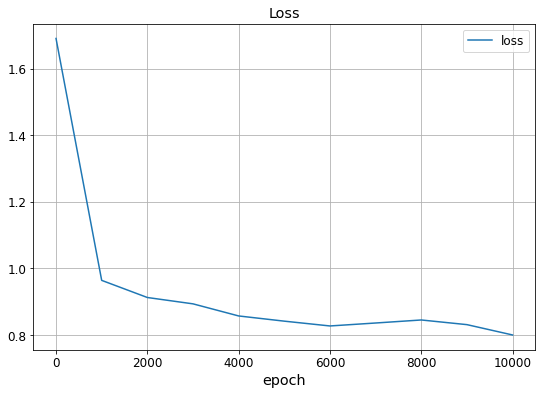

In [36]:
ax = loss_df.plot(x = 'epoch')
ax.grid()
ax.set_title('Loss')

In [8]:
import tensorflow as tf

In [19]:
# X_train.shape[1],20,20,10,10,10

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_shape=(X_train.shape[1],), activation='tanh'),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(10, activation='tanh'),
  tf.keras.layers.Dense(10, activation='tanh'),
  tf.keras.layers.Dense(10)
])

In [13]:
#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [14]:
y_train[:1]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
predictions = model(X_train[:1]).numpy()
predictions

array([[ 0.3484723 ,  0.4344911 ,  0.49872816,  0.04255177, -0.5313569 ,
         0.16427976, -0.48048285,  0.0947413 ,  0.5134456 ,  0.05693232]],
      dtype=float32)

In [22]:
model.compile(optimizer='SGD',
              loss=loss_fn,
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
Total params: 16,550
Trainable params: 16,550
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train, y_train , epochs = EPOCHS, verbose = 1)

Epoch 1/10000
1875/1875 [==============================] - 2s 972us/step - loss: 1.7114 - accuracy: 0.1988
Epoch 2/10000
1875/1875 [==============================] - 2s 921us/step - loss: 1.7165 - accuracy: 0.1997
Epoch 3/10000
1875/1875 [==============================] - 2s 930us/step - loss: 1.7384 - accuracy: 0.1985
Epoch 4/10000
1875/1875 [==============================] - 2s 915us/step - loss: 1.7881 - accuracy: 0.1972
Epoch 5/10000
1875/1875 [==============================] - 2s 917us/step - loss: 1.7745 - accuracy: 0.1955
Epoch 6/10000
1875/1875 [==============================] - 2s 929us/step - loss: 1.7721 - accuracy: 0.1962
Epoch 7/10000
1875/1875 [==============================] - 2s 927us/step - loss: 1.7398 - accuracy: 0.1974
Epoch 8/10000
1875/1875 [==============================] - 2s 919us/step - loss: 1.7823 - accuracy: 0.1947
Epoch 9/10000
1875/1875 [==============================] - 2s 923us/step - loss: 1.7389 - accuracy: 0.1965
Epoch 10/10000
1875/1875 [===========

1875/1875 [==============================] - 2s 889us/step - loss: 1.6915 - accuracy: 0.2012
Epoch 153/10000
1875/1875 [==============================] - 2s 892us/step - loss: 1.6915 - accuracy: 0.1990
Epoch 154/10000
1875/1875 [==============================] - 2s 882us/step - loss: 1.6916 - accuracy: 0.1999
Epoch 155/10000
1875/1875 [==============================] - 2s 893us/step - loss: 1.6916 - accuracy: 0.1957
Epoch 156/10000
1875/1875 [==============================] - 2s 889us/step - loss: 1.6915 - accuracy: 0.1999
Epoch 157/10000
1875/1875 [==============================] - 2s 888us/step - loss: 1.6915 - accuracy: 0.1994
Epoch 158/10000
1875/1875 [==============================] - 2s 891us/step - loss: 1.6915 - accuracy: 0.1985
Epoch 159/10000
1875/1875 [==============================] - 2s 890us/step - loss: 1.6915 - accuracy: 0.1971
Epoch 160/10000
1875/1875 [==============================] - 2s 886us/step - loss: 1.6916 - accuracy: 0.1986
Epoch 161/10000
1875/1875 [========

KeyboardInterrupt: 

https://www.tensorflow.org/tutorials/keras/regression